<a href="https://colab.research.google.com/github/AlejandroSepulvedaGuatecique/Projects-in-Ml-and-AI-/blob/main/HW3/HW3_ML_10_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HOMEWORK 3: DEEP LEARNING

## RESOURCES USED TO LEARN THE TENSORFLOW FRAMEWORK

Tensorflow is the framework selected to implement the Neural Network model. Different resources were used from Tensorflow documentation to articles in publishing platform (e.g. towards data science). Each resource used to develop this work is listed below along with a brief description:

* [Introduction to NN on TF](https://towardsdatascience.com/a-simple-introduction-to-tensorflow-d992eb2e3dbb): This article provides a quick introduction to TensorFlow functions and how to develop a Neural Network using TensorFlow. The article helped me to get the general idea. 

* [Keras Sequential Model](https://keras.io/guides/sequential_model/): The sequential model from keras library is a key function to build Neural Networks in Tensorflow. This link provides guidance on how to use them. 

* [TF Keras layers Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense): This link gives information regarding the arguments, input shape and outshape of the regular densely-connected NN layer. Here the activitation function, regularization and the input shape information was useful. 

* [compile function](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile): model compile is the function to provide the optimizer, the loss function and the metrics. This link is the TensorFlow manual for the model compile function. 

* [fit model function](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) model fit is the function to train the ML model to a particular data set. The batch size and number of epochs are defined in this step. This link is the TF manual for the fit model function.

* [Regularization implementation](https://towardsdatascience.com/regularization-techniques-and-their-implementation-in-tensorflow-keras-c06e7551e709) L2 regularization is introduced and explained in this article using keras and tensorflow.

## PROJECT DESIGN AND IMPLEMENTATION

The objective of this project is to develop a Neural Network to classify clothing articles based on images. The data set is provided by Zalando which is a publicly traded German online retailer of clothing articles. The data set contains 70000 images with the associated classification label. Each image is given as a 28x28 grayscale format. Each pixel is represented by single pixel-value indicating the lightness or darkness of the pixel. The higher the number the darker the pixel is. The pixel value is an integer between 0 and 255. The data set can be downloaded from this link [Data](https://github.com/zalandoresearch/fashion-mnist)

### EXPLORATORY DATA ANALYSIS

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X = np.concatenate((X_train,X_test), axis=0)
y = np.concatenate((y_train,y_test), axis=0)
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

4431872/4422102 [==============================] - 0s 0us/step


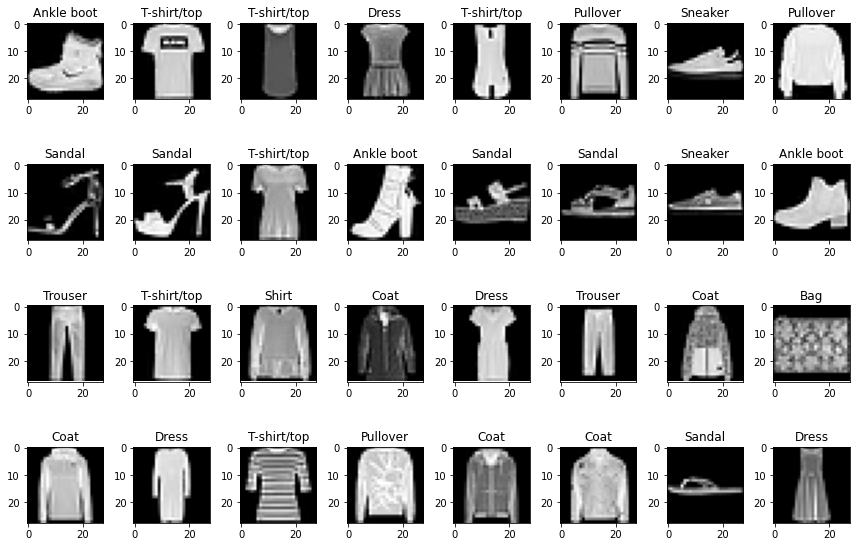

In [17]:
# specify the number of rows and columns you want to see
num_row = 4
num_col = 8

# get a segment of the dataset
num = num_row*num_col
images = X[:num]
labels = y[:num]

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num_row*num_col):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('{}'.format(class_names[labels[i]]))
plt.tight_layout()
plt.show()

Here, we can see a sample of the data set. The data set are images of 10 different clothing articles in grey scale. The labels goes from 0 to 9 and the definition is as follows:

* 0 T-shirt/top
* 1 Trouser
* 2 Pullover
* 3 Dress
* 4 Coat
* 5 Sandal
* 6 Shirt
* 7 Sneaker
* 8 Bag
* 9 Ankle boot

Based on the images, one can expect different challenges. The clothing articles coat, pullover, dress and t-shirt/top have a similar shape and it is possible that a human would made some errors when labeling these articles based on grey scale image. The same comment may apply to sneakers, sandals and angle boats. On the other hand, trouser and bag may be easier to identify. These comments are based from a human perspective. During the analysis these comments will be verified. Nevertheless anticipating possible problems it is a good practice to planned areas to improved on. 

In [ ]:
unique, counts = np.unique(y, return_counts=True)
print(np.asarray((unique, counts)).T)

[[   0 7000]
 [   1 7000]
 [   2 7000]
 [   3 7000]
 [   4 7000]
 [   5 7000]
 [   6 7000]
 [   7 7000]
 [   8 7000]
 [   9 7000]]


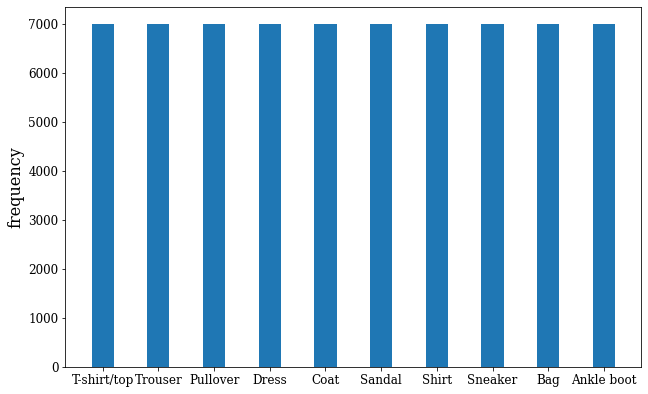

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,5))
ax = fig.add_axes([0,0,1,1])
langs = ['C', 'C++', 'Java', 'Python', 'PHP']
students = counts
ax.bar(class_names,students,0.4)
fontdict={  'fontsize': 16, 'fontname': 'serif'}
ax.set_ylabel('frequency',fontdict)
for tick in ax.get_xticklabels():
        tick.set_fontname("serif")
        tick.set_fontsize(12)
for tick in ax.get_yticklabels():
        tick.set_fontname("serif")
        tick.set_fontsize(12)
plt.show()

This bar graph shows the data distribution among the labels. The data set is evenly distributed among each clothing article. Each label has 7000 examples. Data distribution is important since it may lead to biased models when the data is not evenly distributed. 

### TRAIN-DEV-TEST SPLIT

Here we will pre-process the data. The data is initially given as a train and test set. However, for this project we want to split the data in three parts: training, validation and test data sets. Also, the pixel-values should be normalized. In this work, they will be normalized to have a range between 0 and 1, therefore all the pixel values will be divided by 255. 

In [3]:
# loading the data
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X = np.concatenate((X_train,X_test), axis=0)
y = np.concatenate((y_train,y_test), axis=0)
X = X/255.0


In addition the data should be shuffle before it is used to train the Neural network.  Finally, the data is splitted in three parts as follows: 80% to the training data set and 10% for both the validation and test data set. 

In [4]:
np.random.seed(42)
A = np.arange(0,69999)
np.random.shuffle(A)
train, validate, test = np.split(A,[int(.8*len(A)), int(.9*len(A))])
X_train = X[train]
X_val = X[validate]
X_test = X[test]
y_train = y[train]
y_val = y[validate]
y_test = y[test]
print('X_train shape is: ' + str(X_train.shape))
print('X_val shape is:  '  + str(X_val.shape))
print('X_test shape is:  '  + str(X_test.shape))
print('y_train shape is: ' + str(y_train.shape))
print('y_val shape is:  '  + str(y_val.shape))
print('y_test shape is:  '  + str(y_test.shape))

X_train shape is: (55999, 28, 28)
X_val shape is:  (7000, 28, 28)
X_test shape is:  (7000, 28, 28)
y_train shape is: (55999,)
y_val shape is:  (7000,)
y_test shape is:  (7000,)


### FORWARD PROPAGATION IMPLEMENTATION

In this step, I will define the architecture of the Neural Network. The architecture of the Neural Network is composed of two layers as follows:
 * 1 hidden layer with 128 nodes and the rectified linear activation function (ReLU) is used as the activation function for this layer. ReLU is a piecewise linear function that will output the input directly if it positive, otherwise, it will output zero. 
 * The second layer is the output layer with 10 nodes since we have 10 different class labels. The activation function is the softmax function which will give us the associated probability of each class for a particular test set
 * Note that there is an initial layer if the code, however it has no effect on the Neural Network analysis. The initial layer is reshaping the image data from a 28x28 matrix to a 1D vector. 

In [18]:
del model
model = tf.keras.models.Sequential([ 
  tf.keras.layers.Flatten(input_shape=(28, 28)), 
  tf.keras.layers.Dense(128, activation='relu'),    
  tf.keras.layers.Dense(10, activation='softmax')     
])

In [19]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


### DEFINING COST FUNCTION AND GRADIENT DESCENT IMPLEMENTATION

For this work, the Sparse Categorical Cross entropy is used as the loss function. The hyperparameters are trained using the gradient descent algorithm and the Adam optimization is applied. The metric used to evaluate this ML model is accuracy. The accuracy is the ratio between the corrected predictions over the number of test instances. This metric is selected since there is no particular reason to prioratize recall or precision over the predictions. A miss-classification of a particular label is as important as other labels. 

In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Finally the model is trained with the train data set. 

In [21]:
history = model.fit(X_train, y_train, epochs=5, batch_size=2**10)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


55/55 [==============================] - 1s 12ms/step - loss: 0.8827 - accuracy: 0.7009
Epoch 2/5
55/55 [==============================] - 1s 12ms/step - loss: 0.5193 - accuracy: 0.8246
Epoch 3/5
55/55 [==============================] - 1s 12ms/step - loss: 0.4612 - accuracy: 0.8427
Epoch 4/5
55/55 [==============================] - 1s 12ms/step - loss: 0.4279 - accuracy: 0.8537
Epoch 5/5
55/55 [==============================] - 1s 12ms/step - loss: 0.4048 - accuracy: 0.8596


In [22]:
loss = history.history['loss']
accuracy = history.history['accuracy']

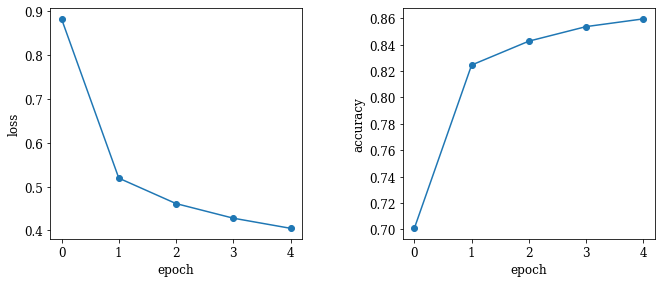

In [23]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(12,4))
fig.subplots_adjust(wspace=0.4,hspace=0,left=0.2, right=0.9, top=0.9, bottom=0.1)
fontdict={  'fontsize': 12, 'fontname': 'serif'}
axes[0].plot(loss,'-o')
axes[0].set_xlabel('epoch',fontdict)
axes[0].set_ylabel('loss',fontdict)
#axes[0].set_ylim(0.14, 0.18)

axes[1].plot(accuracy,'-o')
axes[1].set_xlabel('epoch',fontdict)
axes[1].set_ylabel('accuracy',fontdict)
#axes[1].set_ylim(0.94, 0.95)


for tick in axes[0].get_xticklabels():
        tick.set_fontname("serif")
        tick.set_fontsize(12)
for tick in axes[0].get_yticklabels():
        tick.set_fontname("serif")
        tick.set_fontsize(12)

for tick in axes[1].get_xticklabels():
        tick.set_fontname("serif")
        tick.set_fontsize(12)
for tick in axes[1].get_yticklabels():
        tick.set_fontname("serif")
        tick.set_fontsize(12)

In this figure we can see how the loss is decreasing as the number of epoch increases. On the other hand the accuracy is also increasing as the number of epoch increases. However, neither the loss nor the accuracy are settling, this is an indicator that we may be underfitting the data. Nevertheless, the hyperparameter tunning will be done in a future section of this work. In the hyperparameter tunning section the validation set will be used.

### PRESENTING RESULTS BASED ON TEST SET

The accuracy metric computed before was based on the training data set, however the metric should be computed on the test data set. 

In [24]:
loss, acc = model.evaluate(X_test, y_test, verbose = 1)
print('Test accuracy: ', acc)

219/219 [==============================] - 0s 1ms/step - loss: 0.4062 - accuracy: 0.8586
Test accuracy:  0.8585714101791382


An accuracy of 0.86 (86%) was obtained using the test data set. This means that 6300 out of 7000 examples were classified correctly. Note that the validation data set has not been used. This is because the hyperparameters tunning have not been done. The following section will take care of that. 

### TUNNING AND DISCUSSION OF ARCHITECTURE, HYPERPARAMETERS AND OPTIMIZATION FEATURES

### HIDDEN LAYERS EFFECT

Lets start by changing the Neural Network architecture of the problem. Before a 2 layer Neural Network was defined. In this case, the Neural Network will have **3 hidden layers** with the relu activation function, the number of nodes associated with each layer is 128. The output layer will remain as before (10 nodes and softmax activation function). 

In [42]:
model = tf.keras.models.Sequential([ 
  tf.keras.layers.Flatten(input_shape=(28, 28)), 
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),        
  tf.keras.layers.Dense(128, activation='relu'),    
  tf.keras.layers.Dense(10, activation='softmax')     
])
print(model.summary())

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
LOSS_v = np.zeros(5,)
ACC_v = np.zeros(5,)
LOSS_t = np.zeros(5,)
ACC_t = np.zeros(5,)
for i in range(1,6,1):
    history = model.fit(X_train, y_train, epochs=i, batch_size=2**10)
    # test the model on validation data
    loss, acc = model.evaluate(X_val, y_val, verbose = 1)
    LOSS_v[i-1] = loss; ACC_v[i-1] = acc
    loss, acc = model.evaluate(X_train, y_train, verbose = 1)
    LOSS_t[i-1] = loss; ACC_t[i-1] = acc

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 784)               0         
                                                                 
 dense_42 (Dense)            (None, 128)               100480    
                                                                 
 dense_43 (Dense)            (None, 128)               16512     
                                                                 
 dense_44 (Dense)            (None, 128)               16512     
                                                                 
 dense_45 (Dense)            (None, 10)                1290      
                                                                 
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________
None
1750/1750 [==============================]

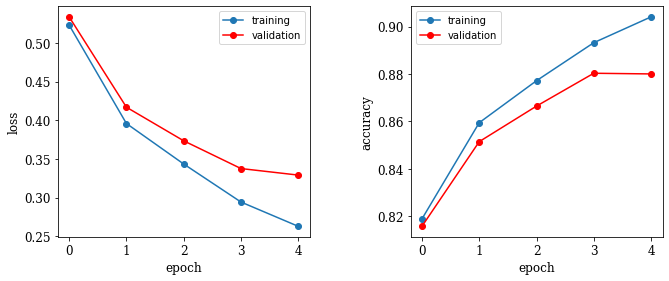

In [45]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(12,4))
fig.subplots_adjust(wspace=0.4,hspace=0,left=0.2, right=0.9, top=0.9, bottom=0.1)
fontdict={  'fontsize': 12, 'fontname': 'serif'}
axes[0].plot(LOSS_t,'-o', label = 'training')
axes[0].plot(LOSS_v,'-ro', label = 'validation')
axes[0].set_xlabel('epoch',fontdict)
axes[0].set_ylabel('loss',fontdict)
#axes[0].set_ylim(0.14, 0.18)
axes[0].legend()

axes[1].plot(ACC_t,'-o', label = 'training')
axes[1].plot(ACC_v,'-ro', label = 'validation')
axes[1].set_xlabel('epoch',fontdict)
axes[1].set_ylabel('accuracy',fontdict)
#axes[1].set_ylim(0.94, 0.95)
axes[1].legend()

for tick in axes[0].get_xticklabels():
        tick.set_fontname("serif")
        tick.set_fontsize(12)
for tick in axes[0].get_yticklabels():
        tick.set_fontname("serif")
        tick.set_fontsize(12)

for tick in axes[1].get_xticklabels():
        tick.set_fontname("serif")
        tick.set_fontsize(12)
for tick in axes[1].get_yticklabels():
        tick.set_fontname("serif")
        tick.set_fontsize(12)

In [50]:
# test the model on validation dataX_train, y_train
loss, acc = model.evaluate(X_train, y_train, verbose = 1)
print('\n accuracy using the training data set: %5.2f' %(acc))
print('loss using the training data set: %5.2f' %(loss))
loss, acc = model.evaluate(X_val, y_val, verbose = 1)
print('\n accuracy using the validation data set: %5.2f' %(acc))
print('loss using the validation data set: %5.2f' %(loss))

1750/1750 [==============================] - 3s 2ms/step - loss: 0.2629 - accuracy: 0.9041

 accuracy using the training data set:  0.90

 loss using the training data set:  0.26
219/219 [==============================] - 0s 1ms/step - loss: 0.3291 - accuracy: 0.8800

 accuracy using the validation data set:  0.88

 loss using the validation data set:  0.33


For this Neural Network with three hidden layers, the loss and accuracy values obtained using the training data set are 0.26 and 0.90, respectively. These are slightly better results with respect to the model with a single hidden layer. The loss and accuracy obtained are 0.33 and 0.88, respectively. The discrepancy of loss and metric using the training data set with respect to the validation data set is not as large.  This is an indication that the data is well distributed among the validation and training data sets and no overfitting is happening.

I will again increase the number of layers of the Neural Network. the Neural Network will have **5 hidden layers** with the relu activation function, the number of nodes associated with each layer is 128. The output layer will remain as before (10 nodes and softmax activation function). 

In [52]:
model = tf.keras.models.Sequential([ 
  tf.keras.layers.Flatten(input_shape=(28, 28)), 
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),        
  tf.keras.layers.Dense(128, activation='relu'),    
  tf.keras.layers.Dense(10, activation='softmax')     
])
print(model.summary())

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
LOSS_v = np.zeros(5,)
ACC_v = np.zeros(5,)
LOSS_t = np.zeros(5,)
ACC_t = np.zeros(5,)
for i in range(1,6,1):
    history = model.fit(X_train, y_train, epochs=i, batch_size=2**10)
    # test the model on validation data
    loss, acc = model.evaluate(X_val, y_val, verbose = 1)
    LOSS_v[i-1] = loss; ACC_v[i-1] = acc
    loss, acc = model.evaluate(X_train, y_train, verbose = 1)
    LOSS_t[i-1] = loss; ACC_t[i-1] = acc

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_14 (Flatten)        (None, 784)               0         
                                                                 
 dense_52 (Dense)            (None, 128)               100480    
                                                                 
 dense_53 (Dense)            (None, 128)               16512     
                                                                 
 dense_54 (Dense)            (None, 128)               16512     
                                                                 
 dense_55 (Dense)            (None, 128)               16512     
                                                                 
 dense_56 (Dense)            (None, 128)               16512     
                                                                 
 dense_57 (Dense)            (None, 10)              

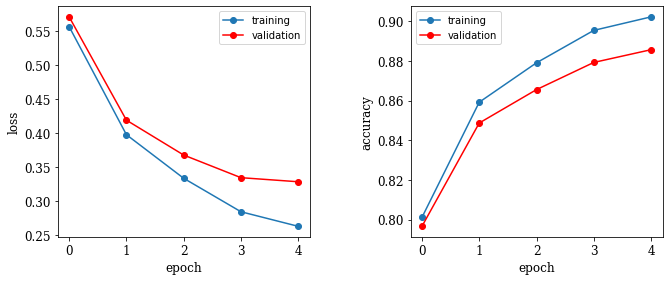

In [53]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(12,4))
fig.subplots_adjust(wspace=0.4,hspace=0,left=0.2, right=0.9, top=0.9, bottom=0.1)
fontdict={  'fontsize': 12, 'fontname': 'serif'}
axes[0].plot(LOSS_t,'-o', label = 'training')
axes[0].plot(LOSS_v,'-ro', label = 'validation')
axes[0].set_xlabel('epoch',fontdict)
axes[0].set_ylabel('loss',fontdict)
#axes[0].set_ylim(0.14, 0.18)
axes[0].legend()

axes[1].plot(ACC_t,'-o', label = 'training')
axes[1].plot(ACC_v,'-ro', label = 'validation')
axes[1].set_xlabel('epoch',fontdict)
axes[1].set_ylabel('accuracy',fontdict)
#axes[1].set_ylim(0.94, 0.95)
axes[1].legend()

for tick in axes[0].get_xticklabels():
        tick.set_fontname("serif")
        tick.set_fontsize(12)
for tick in axes[0].get_yticklabels():
        tick.set_fontname("serif")
        tick.set_fontsize(12)

for tick in axes[1].get_xticklabels():
        tick.set_fontname("serif")
        tick.set_fontsize(12)
for tick in axes[1].get_yticklabels():
        tick.set_fontname("serif")
        tick.set_fontsize(12)

In [54]:
# test the model on validation dataX_train, y_train
loss, acc = model.evaluate(X_train, y_train, verbose = 1)
print('\n accuracy using the training data set: %5.2f' %(acc))
print('loss using the training data set: %5.2f' %(loss))
loss, acc = model.evaluate(X_val, y_val, verbose = 1)
print('\n accuracy using the validation data set: %5.2f' %(acc))
print('loss using the validation data set: %5.2f' %(loss))

1750/1750 [==============================] - 3s 2ms/step - loss: 0.2631 - accuracy: 0.9023

 accuracy using the training data set:  0.90
loss using the training data set:  0.26
219/219 [==============================] - 0s 2ms/step - loss: 0.3286 - accuracy: 0.8857

 accuracy using the validation data set:  0.89
loss using the validation data set:  0.33


For this Neural Network with 5 hidden layers, the loss and accuracy values obtained using the validation data set are 0.33 and 0.89, respectively. These values are almost the same results with respect to the model with 3 hidden layers. This is an indication that adding more layers to the data set will not improve the performance of the model and may lead to overfitting issues. In this work 5 hidden layers are selected for the NN. 

### NUMBER OF NODES EFFECT

The number of nodes per each layer will be increased in this step. this Neural Network have **5 hidden layers** with the relu activation function and the number of nodes associated with each layer, from layer 1 to 6 is 512, 256, 128, 64, 32, 10. The output layer will remain as before (10 nodes and softmax activation function). Note that the input layer have 784 units and it is generally not recommended to have a hidden layer with a number of nodes significantly larger than input features.

In [55]:
model = tf.keras.models.Sequential([ 
  tf.keras.layers.Flatten(input_shape=(28, 28)), 
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),        
  tf.keras.layers.Dense(32, activation='relu'),    
  tf.keras.layers.Dense(10, activation='softmax')      
])
print(model.summary())

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
LOSS_v = np.zeros(5,)
ACC_v = np.zeros(5,)
LOSS_t = np.zeros(5,)
ACC_t = np.zeros(5,)
for i in range(1,6,1):
    history = model.fit(X_train, y_train, epochs=i, batch_size=2**10)
    # test the model on validation data
    loss, acc = model.evaluate(X_val, y_val, verbose = 1)
    LOSS_v[i-1] = loss; ACC_v[i-1] = acc
    loss, acc = model.evaluate(X_train, y_train, verbose = 1)
    LOSS_t[i-1] = loss; ACC_t[i-1] = acc

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_15 (Flatten)        (None, 784)               0         
                                                                 
 dense_58 (Dense)            (None, 512)               401920    
                                                                 
 dense_59 (Dense)            (None, 256)               131328    
                                                                 
 dense_60 (Dense)            (None, 128)               32896     
                                                                 
 dense_61 (Dense)            (None, 64)                8256      
                                                                 
 dense_62 (Dense)            (None, 32)                2080      
                                                                 
 dense_63 (Dense)            (None, 10)              

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1750/1750 [==============================] - 5s 3ms/step - loss: 0.5201 - accuracy: 0.8116
Epoch 1/2
55/55 [==============================] - 3s 54ms/step - loss: 0.4587 - accuracy: 0.8402
Epoch 2/2
1750/1750 [==============================] - 6s 3ms/step - loss: 0.3720 - accuracy: 0.8693
Epoch 1/3
55/55 [==============================] - 4s 77ms/step - loss: 0.3648 - accuracy: 0.8710
Epoch 2/3
55/55 [==============================] - 3s 55ms/step - loss: 0.3384 - accuracy: 0.8787
Epoch 3/3
1750/1750 [==============================] - 6s 3ms/step - loss: 0.2926 - accuracy: 0.8958
Epoch 1/4
55/55 [==============================] - 3s 55ms/step - loss: 0.3016 - accuracy: 0.8910
Epoch 2/4
55/55 [==============================] - 3s 54ms/step - loss: 0.2939 - accuracy: 0.8924
Epoch 3/4
55/55 [==============================] - 3s 55ms/step - loss: 0.2770 - accuracy: 0.8989
Epoch 4/4
1750/1750 [==============================] - 5s 3ms/step - loss: 0.2547 - accuracy: 0.9078
Epoch 1/5
55/55 [=

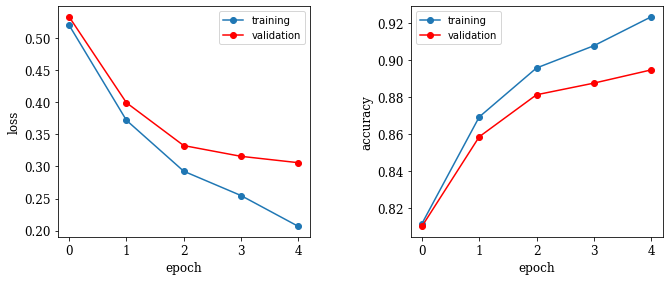

In [56]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(12,4))
fig.subplots_adjust(wspace=0.4,hspace=0,left=0.2, right=0.9, top=0.9, bottom=0.1)
fontdict={  'fontsize': 12, 'fontname': 'serif'}
axes[0].plot(LOSS_t,'-o', label = 'training')
axes[0].plot(LOSS_v,'-ro', label = 'validation')
axes[0].set_xlabel('epoch',fontdict)
axes[0].set_ylabel('loss',fontdict)
#axes[0].set_ylim(0.14, 0.18)
axes[0].legend()

axes[1].plot(ACC_t,'-o', label = 'training')
axes[1].plot(ACC_v,'-ro', label = 'validation')
axes[1].set_xlabel('epoch',fontdict)
axes[1].set_ylabel('accuracy',fontdict)
#axes[1].set_ylim(0.94, 0.95)
axes[1].legend()

for tick in axes[0].get_xticklabels():
        tick.set_fontname("serif")
        tick.set_fontsize(12)
for tick in axes[0].get_yticklabels():
        tick.set_fontname("serif")
        tick.set_fontsize(12)

for tick in axes[1].get_xticklabels():
        tick.set_fontname("serif")
        tick.set_fontsize(12)
for tick in axes[1].get_yticklabels():
        tick.set_fontname("serif")
        tick.set_fontsize(12)

In [57]:
# test the model on validation dataX_train, y_train
loss, acc = model.evaluate(X_train, y_train, verbose = 1)
print('\n accuracy using the training data set: %5.2f' %(acc))
print('loss using the training data set: %5.2f' %(loss))
loss, acc = model.evaluate(X_val, y_val, verbose = 1)
print('\n accuracy using the validation data set: %5.2f' %(acc))
print('loss using the validation data set: %5.2f' %(loss))

1750/1750 [==============================] - 5s 3ms/step - loss: 0.2067 - accuracy: 0.9234

 accuracy using the training data set:  0.92
loss using the training data set:  0.21
219/219 [==============================] - 1s 3ms/step - loss: 0.3059 - accuracy: 0.8947

 accuracy using the validation data set:  0.89
loss using the validation data set:  0.31


For this Neural Network the number of nodes were increased, the loss and accuracy values obtained using the validation data set are 0.31 and 0.89, respectively. These values are almost the same results with respect to the model with 5 hidden layers and less nodes. This is an indication that adding more nodes to the hidden layers set will not improve the performance of the model and, actually may lead to overfitting issues. In this work, 128 nodes will be used for each hidden layer.

### EFFECT OF ACTIVATION FUNCTION

For this NN, the architecture will be the same as the previous model but the activation function for the hidden layers will be the sigmoid function.

In [61]:
model = tf.keras.models.Sequential([ 
  tf.keras.layers.Flatten(input_shape=(28, 28)), 
  tf.keras.layers.Dense(128, activation='sigmoid'),
  tf.keras.layers.Dense(128, activation='sigmoid'),
  tf.keras.layers.Dense(128, activation='sigmoid'),
  tf.keras.layers.Dense(128, activation='sigmoid'),        
  tf.keras.layers.Dense(128, activation='sigmoid'),    
  tf.keras.layers.Dense(10, activation='softmax')        
])
print(model.summary())

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
LOSS_v = np.zeros(5,)
ACC_v = np.zeros(5,)
LOSS_t = np.zeros(5,)
ACC_t = np.zeros(5,)
for i in range(1,6,1):
    history = model.fit(X_train, y_train, epochs=i, batch_size=2**10)
    # test the model on validation data
    loss, acc = model.evaluate(X_val, y_val, verbose = 1)
    LOSS_v[i-1] = loss; ACC_v[i-1] = acc
    loss, acc = model.evaluate(X_train, y_train, verbose = 1)
    LOSS_t[i-1] = loss; ACC_t[i-1] = acc

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_18 (Flatten)        (None, 784)               0         
                                                                 
 dense_70 (Dense)            (None, 128)               100480    
                                                                 
 dense_71 (Dense)            (None, 128)               16512     
                                                                 
 dense_72 (Dense)            (None, 128)               16512     
                                                                 
 dense_73 (Dense)            (None, 128)               16512     
                                                                 
 dense_74 (Dense)            (None, 128)               16512     
                                                                 
 dense_75 (Dense)            (None, 10)              

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1750/1750 [==============================] - 3s 2ms/step - loss: 2.1915 - accuracy: 0.3087
Epoch 1/2
55/55 [==============================] - 1s 22ms/step - loss: 1.7028 - accuracy: 0.3560
Epoch 2/2
1750/1750 [==============================] - 3s 2ms/step - loss: 1.0421 - accuracy: 0.5540
Epoch 1/3
55/55 [==============================] - 1s 22ms/step - loss: 0.9362 - accuracy: 0.6136
Epoch 2/3
55/55 [==============================] - 1s 23ms/step - loss: 0.8190 - accuracy: 0.6713
Epoch 3/3
1750/1750 [==============================] - 3s 2ms/step - loss: 0.6666 - accuracy: 0.7857
Epoch 1/4
55/55 [==============================] - 1s 23ms/step - loss: 0.6259 - accuracy: 0.7899
Epoch 2/4
55/55 [==============================] - 1s 22ms/step - loss: 0.5662 - accuracy: 0.8041
Epoch 3/4
55/55 [==============================] - 1s 22ms/step - loss: 0.5272 - accuracy: 0.8129
Epoch 4/4
1750/1750 [==============================] - 3s 2ms/step - loss: 0.4817 - accuracy: 0.8251
Epoch 1/5
55/55 [=

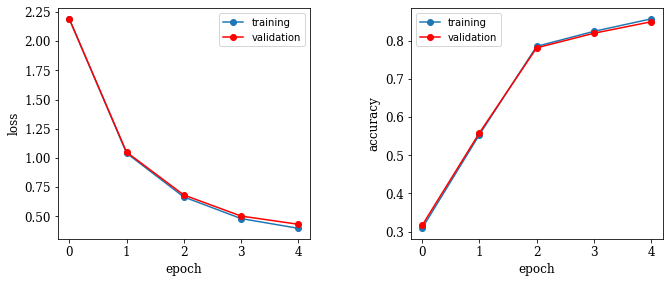

In [62]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(12,4))
fig.subplots_adjust(wspace=0.4,hspace=0,left=0.2, right=0.9, top=0.9, bottom=0.1)
fontdict={  'fontsize': 12, 'fontname': 'serif'}
axes[0].plot(LOSS_t,'-o', label = 'training')
axes[0].plot(LOSS_v,'-ro', label = 'validation')
axes[0].set_xlabel('epoch',fontdict)
axes[0].set_ylabel('loss',fontdict)
#axes[0].set_ylim(0.14, 0.18)
axes[0].legend()

axes[1].plot(ACC_t,'-o', label = 'training')
axes[1].plot(ACC_v,'-ro', label = 'validation')
axes[1].set_xlabel('epoch',fontdict)
axes[1].set_ylabel('accuracy',fontdict)
#axes[1].set_ylim(0.94, 0.95)
axes[1].legend()

for tick in axes[0].get_xticklabels():
        tick.set_fontname("serif")
        tick.set_fontsize(12)
for tick in axes[0].get_yticklabels():
        tick.set_fontname("serif")
        tick.set_fontsize(12)

for tick in axes[1].get_xticklabels():
        tick.set_fontname("serif")
        tick.set_fontsize(12)
for tick in axes[1].get_yticklabels():
        tick.set_fontname("serif")
        tick.set_fontsize(12)

In [63]:
# test the model on validation dataX_train, y_train
loss, acc = model.evaluate(X_train, y_train, verbose = 1)
print('\n accuracy using the training data set: %5.2f' %(acc))
print('loss using the training data set: %5.2f' %(loss))
loss, acc = model.evaluate(X_val, y_val, verbose = 1)
print('\n accuracy using the validation data set: %5.2f' %(acc))
print('loss using the validation data set: %5.2f' %(loss))

1750/1750 [==============================] - 3s 2ms/step - loss: 0.3981 - accuracy: 0.8578

 accuracy using the training data set:  0.86
loss using the training data set:  0.40
219/219 [==============================] - 0s 2ms/step - loss: 0.4328 - accuracy: 0.8501

 accuracy using the validation data set:  0.85
loss using the validation data set:  0.43


For this Neural Network the activation function changed from a relu function to a sigmoid function. When evaluating the model using the validation data set the loss and accuracy values obtained are 0.43 and 0.85, respectively. These values are significantly worse with respect to the NN using the relu function.Therefore, the relu function will be used in this study.

### EFFECT OF NUMBER OF EPOCHS

In this sub section the effect of the number of epochs on the model performance will be evaluated. It is known that increasing the number of epochs indiscriminately will lead to overfitting issues. Therefore, the challenge is to find the adequate number of epochs that will lead to the ideal parameter values without overfitting the data.  

In [64]:
LOSS = np.zeros(8,)
ACC = np.zeros(8,)
LOSS_t = np.zeros(8,)
ACC_t = np.zeros(8,)
for i in range(0,8,1):
    del model
    model = tf.keras.models.Sequential([ 
    tf.keras.layers.Flatten(input_shape=(28, 28)), 
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),        
    tf.keras.layers.Dense(128, activation='relu'),    
    tf.keras.layers.Dense(10, activation='softmax')     
    ])
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=5+2**i, batch_size=2**10)
    loss = history.history['loss']
    accuracy = history.history['accuracy']
    # test the model on validation data
    loss, acc = model.evaluate(X_val, y_val, verbose = 1)
    LOSS[i] = loss
    ACC[i] = acc
    loss, acc = model.evaluate(X_train, y_train, verbose = 1)
    LOSS_t[i] = loss
    ACC_t[i] = acc
    print('\nTest accuracy: ', acc)

Epoch 1/6


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


55/55 [==============================] - 2s 23ms/step - loss: 0.9112 - accuracy: 0.6772
Epoch 2/6
55/55 [==============================] - 1s 24ms/step - loss: 0.4847 - accuracy: 0.8306
Epoch 3/6
55/55 [==============================] - 1s 24ms/step - loss: 0.4191 - accuracy: 0.8513
Epoch 4/6
55/55 [==============================] - 1s 24ms/step - loss: 0.3835 - accuracy: 0.8635
Epoch 5/6
55/55 [==============================] - 1s 24ms/step - loss: 0.3664 - accuracy: 0.8689
Epoch 6/6
1750/1750 [==============================] - 3s 2ms/step - loss: 0.3283 - accuracy: 0.8804

Test accuracy:  0.8804442882537842
Epoch 1/7
55/55 [==============================] - 2s 23ms/step - loss: 0.9023 - accuracy: 0.6848
Epoch 2/7
55/55 [==============================] - 1s 25ms/step - loss: 0.4689 - accuracy: 0.8348
Epoch 3/7
55/55 [==============================] - 1s 24ms/step - loss: 0.4143 - accuracy: 0.8512
Epoch 4/7
55/55 [==============================] - 1s 24ms/step - loss: 0.3769 - accuracy

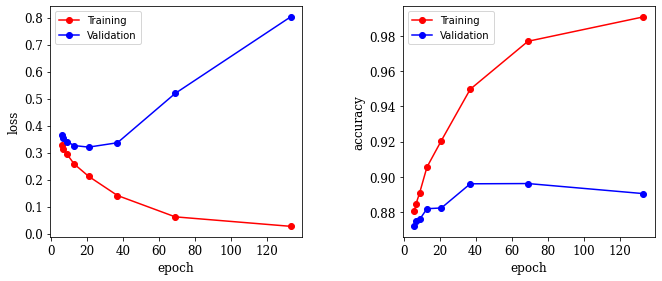

In [65]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(12,4))
fig.subplots_adjust(wspace=0.4,hspace=0,left=0.2, right=0.9, top=0.9, bottom=0.1)
fontdict={  'fontsize': 12, 'fontname': 'serif'}
axes[0].plot(5+2**(np.arange(0,8,1)),LOSS_t,'-ro',label='Training')
axes[0].plot(5+2**(np.arange(0,8,1)),LOSS,'-bo',label='Validation')
axes[0].set_xlabel('epoch',fontdict)
axes[0].set_ylabel('loss',fontdict)
#axes[0].set_ylim(0.14, 0.18) 
axes[0].legend()

axes[1].plot(5+2**(np.arange(0,8,1)),ACC_t,'-ro',label='Training')
axes[1].plot(5+2**(np.arange(0,8,1)),ACC,'-bo',label='Validation')
axes[1].set_xlabel('epoch',fontdict)
axes[1].set_ylabel('accuracy',fontdict)
#axes[1].set_ylim(0.94, 0.95)
axes[1].legend()

for tick in axes[0].get_xticklabels():
        tick.set_fontname("serif")
        tick.set_fontsize(12)
for tick in axes[0].get_yticklabels():
        tick.set_fontname("serif")
        tick.set_fontsize(12)

for tick in axes[1].get_xticklabels():
        tick.set_fontname("serif")
        tick.set_fontsize(12)
for tick in axes[1].get_yticklabels():
        tick.set_fontname("serif")
        tick.set_fontsize(12)

The figure shows the effect of the number of epoch on the loss and accuracy of the NN model. For small values of epoch (0 to 40) the performance of the model increases as the number of epoch increases for both the validation and the training set. However, after 40 epochs the performance on the training data set increases while the performance of the model for the validation set decreases. this behavior is also clear if the same analysis is do to the loss figure. After 40 epochs the loss values obtained using the validation data set increases. This is a clear sign of overfitting. Therefore, a number of epoch equal to 40 is selected for this problem. 

### EFFECT OF OPTIMIZATION ALGORITHM

In [70]:
    del model
    model = tf.keras.models.Sequential([ 
    tf.keras.layers.Flatten(input_shape=(28, 28)), 
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),        
    tf.keras.layers.Dense(128, activation='relu'),    
    tf.keras.layers.Dense(10, activation='softmax')     
    ])
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    import time
    start_time = time.time()
    history = model.fit(X_train, y_train, epochs=40, batch_size=2**10)
    print("--- %s seconds ---" % (time.time() - start_time))
    loss = history.history['loss']
    accuracy = history.history['accuracy']
    # test the model on validation data
    loss, acc = model.evaluate(X_val, y_val, verbose = 1)
    LOSS = loss
    ACC = acc
    loss, acc = model.evaluate(X_train, y_train, verbose = 1)
    LOSS_t = loss
    ACC_t = acc

Epoch 1/40
55/55 [==============================] - 2s 24ms/step - loss: 0.9564 - accuracy: 0.6710
Epoch 2/40
55/55 [==============================] - 1s 24ms/step - loss: 0.4992 - accuracy: 0.8207
Epoch 3/40
55/55 [==============================] - 1s 23ms/step - loss: 0.4357 - accuracy: 0.8441
Epoch 4/40
55/55 [==============================] - 1s 23ms/step - loss: 0.3885 - accuracy: 0.8601
Epoch 5/40
55/55 [==============================] - 1s 23ms/step - loss: 0.3753 - accuracy: 0.8641
Epoch 6/40
55/55 [==============================] - 1s 23ms/step - loss: 0.3458 - accuracy: 0.8752
Epoch 7/40
55/55 [==============================] - 1s 24ms/step - loss: 0.3289 - accuracy: 0.8809
Epoch 8/40
55/55 [==============================] - 1s 24ms/step - loss: 0.3135 - accuracy: 0.8858
Epoch 9/40
55/55 [==============================] - 1s 24ms/step - loss: 0.3019 - accuracy: 0.8884
Epoch 10/40
55/55 [==============================] - 1s 23ms/step - loss: 0.3025 - accuracy: 0.8877
Epoch 11/

In [71]:
# test the model on validation dataX_train, y_train
loss, acc = model.evaluate(X_train, y_train, verbose = 1)
print('\n accuracy using the training data set: %5.2f' %(acc))
print('loss using the training data set: %5.2f' %(loss))
loss, acc = model.evaluate(X_val, y_val, verbose = 1)
print('\n accuracy using the validation data set: %5.2f' %(acc))
print('loss using the validation data set: %5.2f' %(loss))

1750/1750 [==============================] - 3s 2ms/step - loss: 0.1272 - accuracy: 0.9534

 accuracy using the training data set:  0.95
loss using the training data set:  0.13
219/219 [==============================] - 0s 2ms/step - loss: 0.3666 - accuracy: 0.8960

 accuracy using the validation data set:  0.90
loss using the validation data set:  0.37


In [72]:
    del model
    model = tf.keras.models.Sequential([ 
    tf.keras.layers.Flatten(input_shape=(28, 28)), 
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),        
    tf.keras.layers.Dense(128, activation='relu'),    
    tf.keras.layers.Dense(10, activation='softmax')     
    ])
    model.compile(optimizer='RMSprop',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    import time
    start_time = time.time()
    history = model.fit(X_train, y_train, epochs=40, batch_size=2**10)
    print("--- %s seconds ---" % (time.time() - start_time))
    loss = history.history['loss']
    accuracy = history.history['accuracy']
    # test the model on validation data
    loss, acc = model.evaluate(X_val, y_val, verbose = 1)
    LOSS = loss
    ACC = acc
    loss, acc = model.evaluate(X_train, y_train, verbose = 1)
    LOSS_t = loss
    ACC_t = acc
    print('\nTest accuracy: ', acc)

Epoch 1/40
55/55 [==============================] - 2s 25ms/step - loss: 1.0425 - accuracy: 0.6133
Epoch 2/40
55/55 [==============================] - 1s 24ms/step - loss: 0.6400 - accuracy: 0.7605
Epoch 3/40
55/55 [==============================] - 1s 24ms/step - loss: 0.5328 - accuracy: 0.8037
Epoch 4/40
55/55 [==============================] - 1s 24ms/step - loss: 0.4787 - accuracy: 0.8232
Epoch 5/40
55/55 [==============================] - 1s 24ms/step - loss: 0.4390 - accuracy: 0.8357
Epoch 6/40
55/55 [==============================] - 1s 24ms/step - loss: 0.4117 - accuracy: 0.8476
Epoch 7/40
55/55 [==============================] - 1s 24ms/step - loss: 0.3928 - accuracy: 0.8533
Epoch 8/40
55/55 [==============================] - 1s 24ms/step - loss: 0.3785 - accuracy: 0.8572
Epoch 9/40
55/55 [==============================] - 1s 26ms/step - loss: 0.3609 - accuracy: 0.8653
Epoch 10/40
55/55 [==============================] - 2s 36ms/step - loss: 0.3468 - accuracy: 0.8684
Epoch 11/

In [73]:
# test the model on validation dataX_train, y_train
loss, acc = model.evaluate(X_train, y_train, verbose = 1)
print('\n accuracy using the training data set: %5.2f' %(acc))
print('loss using the training data set: %5.2f' %(loss))
loss, acc = model.evaluate(X_val, y_val, verbose = 1)
print('\n accuracy using the validation data set: %5.2f' %(acc))
print('loss using the validation data set: %5.2f' %(loss))

1750/1750 [==============================] - 3s 2ms/step - loss: 0.1461 - accuracy: 0.9446

 accuracy using the training data set:  0.94
loss using the training data set:  0.15
219/219 [==============================] - 0s 2ms/step - loss: 0.3347 - accuracy: 0.8954

 accuracy using the validation data set:  0.90
loss using the validation data set:  0.33


Two optimization algorithms were used: adam and RSMprop. The execution time and model performance on the validation data set was measured for both cases. The total execution time using RMSprop was 55.2 seconds while the total execution time using Adam was 52.4 seconds. That is Adam outperformed the RMSprop for a total of 2.8 seconds. The accuracy achieved using RMSprop and Adam optimization algorithms was the same (0.90), however the loss using adam was 0.37 while RMSprop obtained 0.33. Therefore, adam is selected as the optimization algorithm for this NN. 

### EFFECT OF REGULARIZATION

In [83]:
steps =len(np.linspace(0,0.01,5))
LOSS = np.zeros(steps,)
ACC = np.zeros(steps,)
LOSS_t = np.zeros(steps,)
ACC_t = np.zeros(steps,)
j=0
for i in np.linspace(0,0.01,5):
    del model
    model = tf.keras.models.Sequential([ 
    tf.keras.layers.Flatten(input_shape=(28, 28)), 
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l1_l2(i)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l1_l2(i)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l1_l2(i)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l1_l2(i)),        
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l1_l2(i)),    
    tf.keras.layers.Dense(10, activation='softmax')     
    ])
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=40, batch_size=2**10)
    loss = history.history['loss']
    accuracy = history.history['accuracy']
    # test the model on validation data
    loss, acc = model.evaluate(X_val, y_val, verbose = 1)
    LOSS[j] = loss
    ACC[j] = acc
    loss, acc = model.evaluate(X_train, y_train, verbose = 1)
    LOSS_t[j] = loss
    ACC_t[j] = acc
    j=j+1

Epoch 1/40


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


55/55 [==============================] - 2s 23ms/step - loss: 5.7166 - accuracy: 0.6119
Epoch 2/40
55/55 [==============================] - 1s 23ms/step - loss: 2.6619 - accuracy: 0.7859
Epoch 3/40
55/55 [==============================] - 1s 23ms/step - loss: 1.8240 - accuracy: 0.8065
Epoch 4/40
55/55 [==============================] - 1s 22ms/step - loss: 1.4836 - accuracy: 0.8140
Epoch 5/40
55/55 [==============================] - 1s 22ms/step - loss: 1.3014 - accuracy: 0.8187
Epoch 6/40
55/55 [==============================] - 1s 22ms/step - loss: 1.1887 - accuracy: 0.8218
Epoch 7/40
55/55 [==============================] - 1s 22ms/step - loss: 1.1040 - accuracy: 0.8269
Epoch 8/40
55/55 [==============================] - 1s 23ms/step - loss: 1.0449 - accuracy: 0.8286
Epoch 9/40
55/55 [==============================] - 1s 23ms/step - loss: 0.9898 - accuracy: 0.8338
Epoch 10/40
55/55 [==============================] - 1s 22ms/step - loss: 0.9484 - accuracy: 0.8349
Epoch 11/40
55/55 [=

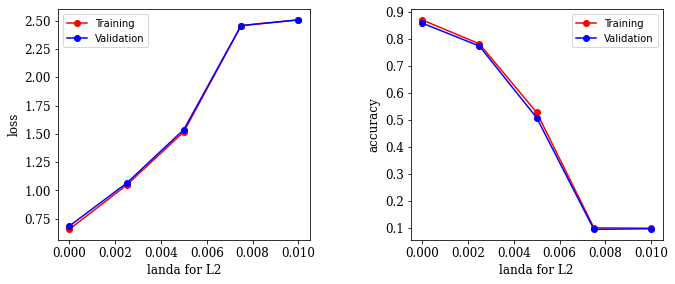

In [87]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(12,4))
fig.subplots_adjust(wspace=0.4,hspace=0,left=0.2, right=0.9, top=0.9, bottom=0.1)
fontdict={  'fontsize': 12, 'fontname': 'serif'}
axes[0].plot(np.linspace(0,0.01,5),LOSS_t,'-ro',label='Training')
axes[0].plot(np.linspace(0,0.01,5),LOSS,'-bo',label='Validation')
axes[0].set_xlabel('landa for L2',fontdict)
axes[0].set_ylabel('loss',fontdict)
#axes[0].set_ylim(0.14, 0.18) 
axes[0].legend()

axes[1].plot(np.linspace(0,0.01,5),ACC_t,'-ro',label='Training')
axes[1].plot(np.linspace(0,0.01,5),ACC,'-bo',label='Validation')
axes[1].set_xlabel('landa for L2',fontdict)
axes[1].set_ylabel('accuracy',fontdict)
#axes[1].set_ylim(0.94, 0.95)
axes[1].legend()

for tick in axes[0].get_xticklabels():
        tick.set_fontname("serif")
        tick.set_fontsize(12)
for tick in axes[0].get_yticklabels():
        tick.set_fontname("serif")
        tick.set_fontsize(12)

for tick in axes[1].get_xticklabels():
        tick.set_fontname("serif")
        tick.set_fontsize(12)
for tick in axes[1].get_yticklabels():
        tick.set_fontname("serif")
        tick.set_fontsize(12)

L2 regularization was implemented with a landa value from 0 to 0.01. The performance of the model decreased with landa. This may be due to the fact that the current model is not overfitting the data and reducing its complexity will just decrease its performance and underfit the data set. When the regularization is increased the weight parameters have a penalty and they get reduced, this leads to less complex models, which is a good practice when a model is overfitting the data. However, the current model is not overfitting the data therefore, no regularization will be done for the current NN.

### FINAL MODEL

Finally, a NN with 5 hidden layers, 128 nodes per layer, adam optimization, relu activation function and softmax output layer is build. The model is optimize using adam algorithm with 40 epochs and the accuracy metric and the sparse categorical cross entropy loss are used to assess the model performance. 

In [88]:
    model = tf.keras.models.Sequential([ 
    tf.keras.layers.Flatten(input_shape=(28, 28)), 
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),        
    tf.keras.layers.Dense(128, activation='relu'),    
    tf.keras.layers.Dense(10, activation='softmax')     
    ])
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=20, batch_size=2**10)
    loss = history.history['loss']
    accuracy = history.history['accuracy']
    # test the model on validation data
    loss, acc = model.evaluate(X_val, y_val, verbose = 1)
    print('\nTest accuracy: ', acc)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


55/55 [==============================] - 2s 23ms/step - loss: 0.9083 - accuracy: 0.6777
Epoch 2/20
55/55 [==============================] - 1s 22ms/step - loss: 0.4734 - accuracy: 0.8326
Epoch 3/20
55/55 [==============================] - 1s 22ms/step - loss: 0.4173 - accuracy: 0.8509
Epoch 4/20
55/55 [==============================] - 1s 22ms/step - loss: 0.3786 - accuracy: 0.8643
Epoch 5/20
55/55 [==============================] - 1s 22ms/step - loss: 0.3697 - accuracy: 0.8675
Epoch 6/20
55/55 [==============================] - 1s 23ms/step - loss: 0.3449 - accuracy: 0.8759
Epoch 7/20
55/55 [==============================] - 1s 22ms/step - loss: 0.3292 - accuracy: 0.8796
Epoch 8/20
55/55 [==============================] - 1s 22ms/step - loss: 0.3141 - accuracy: 0.8856
Epoch 9/20
55/55 [==============================] - 1s 23ms/step - loss: 0.3067 - accuracy: 0.8879
Epoch 10/20
55/55 [==============================] - 1s 22ms/step - loss: 0.2957 - accuracy: 0.8906
Epoch 11/20
55/55 [=

In [89]:
# test the model on validation dataX_train, y_train
loss, acc = model.evaluate(X_train, y_train, verbose = 1)
print('\n accuracy using the training data set: %5.2f' %(acc))
print('loss using the training data set: %5.2f' %(loss))
loss, acc = model.evaluate(X_val, y_val, verbose = 1)
print('\n accuracy using the validation data set: %5.2f' %(acc))
print('loss using the validation data set: %5.2f' %(loss))

1750/1750 [==============================] - 3s 2ms/step - loss: 0.2250 - accuracy: 0.9149

 accuracy using the training data set:  0.91
loss using the training data set:  0.23
219/219 [==============================] - 0s 2ms/step - loss: 0.3203 - accuracy: 0.8851

 accuracy using the validation data set:  0.89
loss using the validation data set:  0.32


The final model obtained a 89% accuracy and 0.32 loss in the validation data set. However, the validation data set have been used in the hyperparameter tunning process. Therefore the assessment of the model performance is biased. As a solution, we can now evaluate the model with the test data set. This data set has not been used previously in any case.

In [93]:
    loss, acc = model.evaluate(X_test, y_test, verbose = 1)
    print('\nTest accuracy: %5.2f' %(acc))
    print('\nTest loss: %5.2f' %(loss))

219/219 [==============================] - 0s 2ms/step - loss: 0.3075 - accuracy: 0.8871

Test accuracy:  0.89

Test loss:  0.31


Finally, an accuracy equal to 89% and a loss equal to 0.31 is reached for the model evaluated on the test data set. Note that the accuracy level and loss reached with the test data set is almost equal with respect to the one obtained using the validation data set. This may be a consequence of a well data distribution. 

## BASELINE MODEL

A logistic regression will be used to fit the data set. After tunning the number of iterations for the logistic regression, the model will be compared with the NN model achieved in the previous section. 

In [95]:
from sklearn.linear_model import LogisticRegression
X_train_log = X_train.flatten().reshape(55999,784)
X_val_log = X_val.flatten().reshape(7000,784)
X_test_log = X_test.flatten().reshape(7000,784)

### EFFECT OF NUMBER OF ITERATIONS

The effect of the number of iterations will be assessed in this section

In [100]:
score_train = np.zeros(5,)
score_val = np.zeros(5,)

for i in range(0,5,1):
  Logistic_model = LogisticRegression(solver='sag',multi_class='auto',max_iter=1+i*10).fit(X_train_log,y_train)
  # Use score method to get accuracy of model
  score_train[i] = Logistic_model.score(X_train_log, y_train)
  score_val[i] = Logistic_model.score(X_val_log, y_val)
  print(score)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[0. 0. 0. 0. 0.]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[0. 0. 0. 0. 0.]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[0. 0. 0. 0. 0.]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


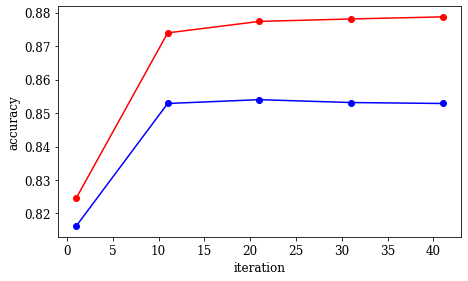

In [101]:
fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(8,4))
fig.subplots_adjust(wspace=0.4,hspace=0,left=0.2, right=0.9, top=0.9, bottom=0.1)
fontdict={  'fontsize': 12, 'fontname': 'serif'}
axes.plot(1+(np.arange(0,5,1))*10,score_train,'-ro',label='Training')
axes.plot(1+(np.arange(0,5,1))*10,score_val,'-bo',label='Validation')

axes.set_xlabel('iteration',fontdict)
axes.set_ylabel('accuracy',fontdict)

for tick in axes.get_xticklabels():
        tick.set_fontname("serif")
        tick.set_fontsize(12)
for tick in axes.get_yticklabels():
        tick.set_fontname("serif")
        tick.set_fontsize(12)

The figure shows the effect of the maximum number of iteration on the performance of the model. It can be seen that after 10 iterations the performance is not improved. Therefore, 10 iterations are selected for this model. 

In [114]:
from sklearn.metrics import log_loss
Logistic_model = LogisticRegression(solver='sag',multi_class='auto',max_iter=10).fit(X_train_log,y_train)
score = Logistic_model.score(X_test_log, y_test)
y_pred = Logistic_model.predict(X_test_log)
loss =  log_loss(y_test, y_pred, labels=class_names)
print('\nTest accuracy: %5.2f' %(score))
print('\nTest loss: %5.2f' %(loss))


Test accuracy:  0.86


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [127]:
score = Logistic_model.score(X_test_log, y_test)
y_pred = Logistic_model.predict_proba(X_test_log)
loss =  log_loss(y_test, y_pred)
print('\nTest accuracy: %5.2f' %(score))
print('\nTest loss: %5.2f' %(loss))


Test accuracy:  0.86

Test loss:  0.41


## COMPARING THE RESULTS OF BOTH MODELS

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx